Electric Vehicle Sales by State in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load and prepare the dataset
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Year'].astype(int)
cat_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[cat_cols] = df[cat_cols].astype('category')

print("Missing values:\n", df.isnull().sum())

Missing values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [3]:
# Feature engineering
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df_model = df.drop(columns=['Date', 'Month_Name'])
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [4]:
# Model training
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Model evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 130.58175227721011


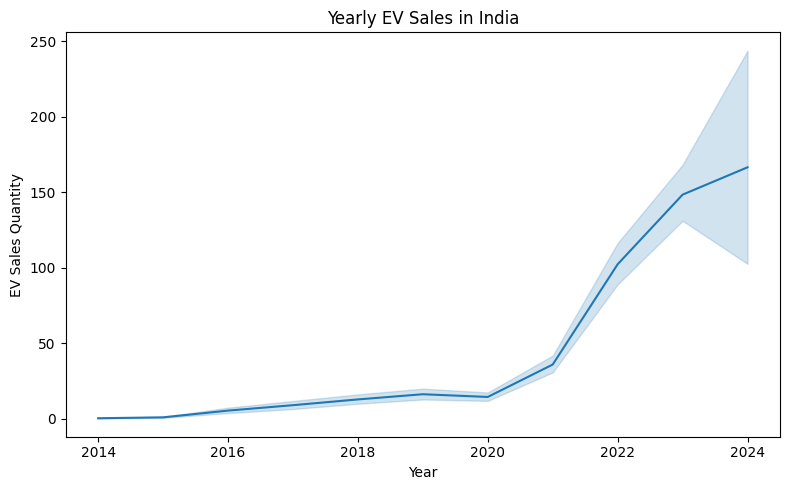

In [6]:
# Yearly sales trend
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df)
plt.title('Yearly EV Sales in India')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.tight_layout()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_18144\2305810111.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, estimator='sum', ci=None, marker='o', color='green')


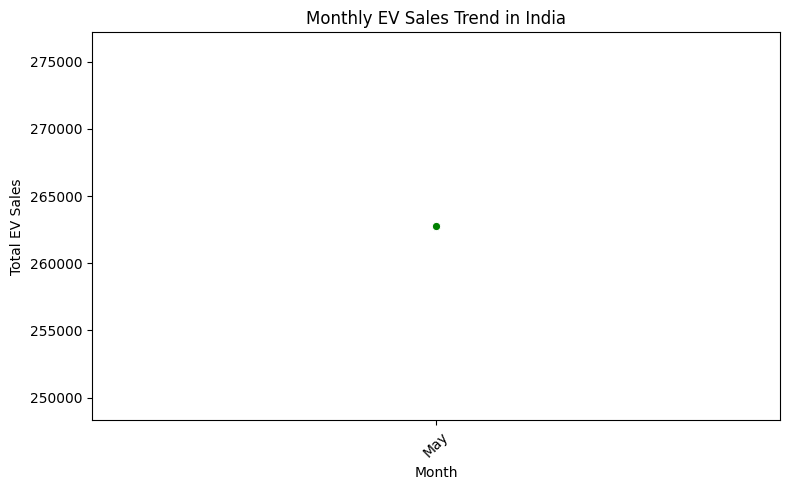

In [7]:
# Monthly sales trend
plt.figure(figsize=(8, 5))
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
df['Month_Name'] = df['Month_Name'].str.capitalize()
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=monthly_order, ordered=True)
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, estimator='sum', ci=None, marker='o', color='green')
plt.title('Monthly EV Sales Trend in India')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


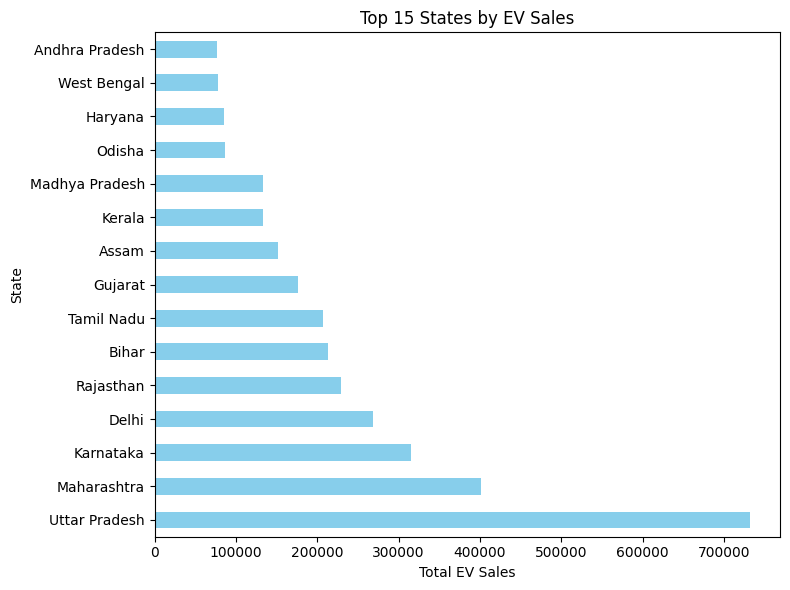

In [8]:
# Top 15 states by EV sales
plt.figure(figsize=(8, 6))
state_sales = df.groupby('State', observed=True)['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(15)
state_sales.plot(kind='barh', color='skyblue')
plt.title('Top 15 States by EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_18144\728966860.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)


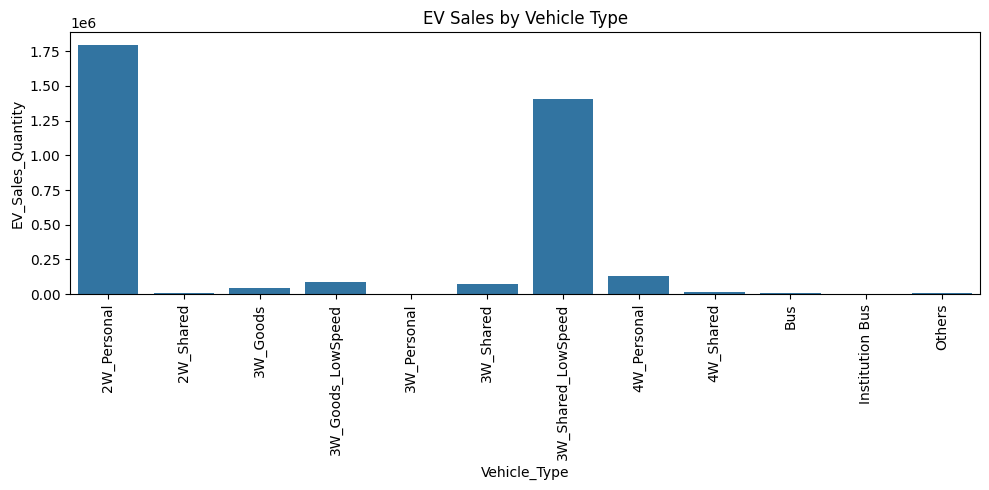

In [9]:
# Sales by vehicle type
plt.figure(figsize=(10, 5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)
plt.title('EV Sales by Vehicle Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_18144\2206010228.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)


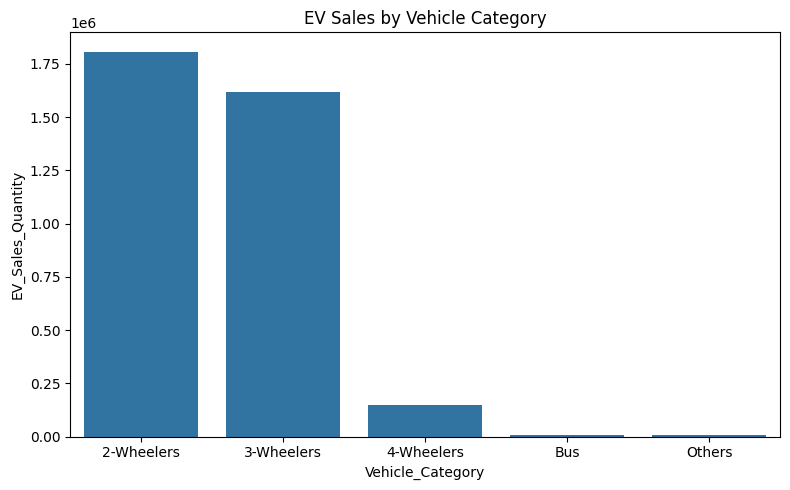

In [10]:
# Sales by vehicle category
plt.figure(figsize=(8, 5))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)
plt.title('EV Sales by Vehicle Category')
plt.tight_layout()
plt.show()

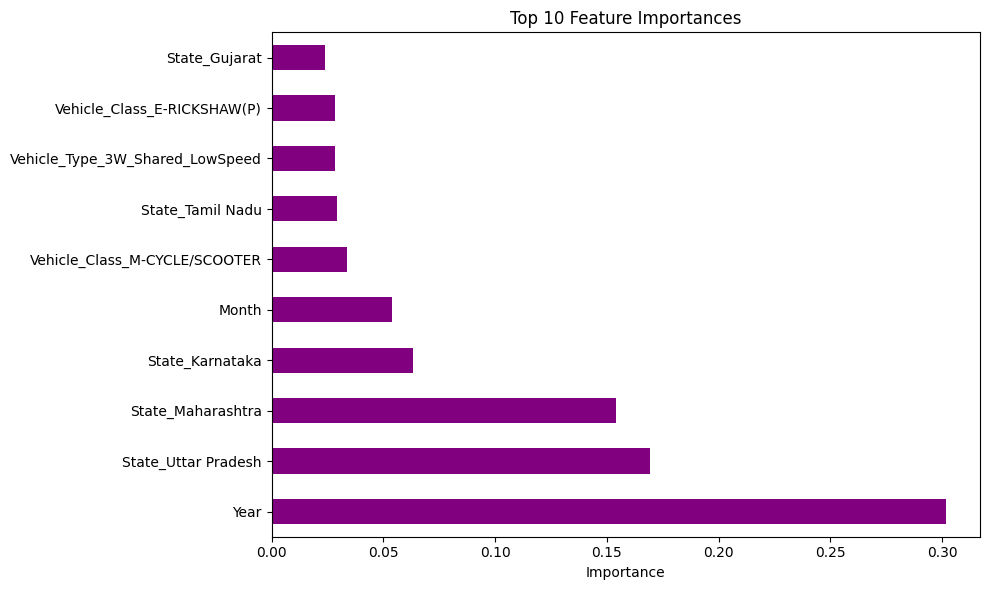

In [11]:
# Feature importance from the trained model
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features.head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

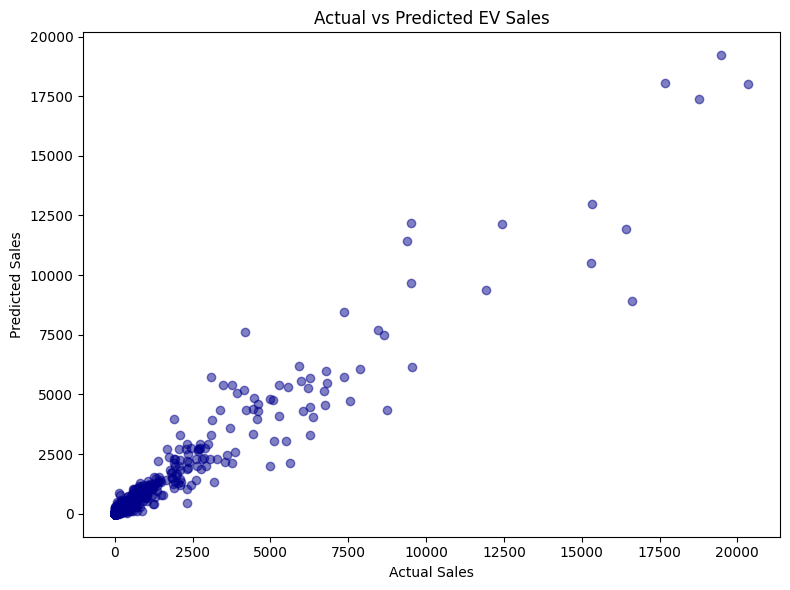

In [12]:
# Prediction vs actual comparison
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkblue')
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.tight_layout()
plt.show()